In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('acidentes2018.csv', sep=';', encoding='latin-1')

In [3]:
print(df.columns)
df.describe()

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')


,id,pesid,br,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
count,164586.000000,164585.000000,164348.000000,164586.000000,155307.000000,149155.000000,164586.000000,164586.000000,164586.000000,164586.000000,164586.000000,164586.000000
mean,142679.194476,312147.822037,216.444788,253726.958733,2008.712292,40.869713,0.448477,0.357776,0.107178,0.032014,-18.533243,-46.674152
std,24309.557174,54378.353324,130.562652,43205.250150,7.457441,66.939167,0.497340,0.479347,0.309340,0.176037,7.926970,6.247125
min,99973.000000,216291.000000,10.000000,177629.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.689819,-70.744728
25%,120769.000000,264038.000000,101.000000,216132.000000,2006.000000,27.000000,0.000000,0.000000,0.000000,0.000000,-25.126580,-50.278201
50%,144173.500000,314016.000000,163.000000,255446.000000,2011.000000,37.000000,0.000000,0.000000,0.000000,0.000000,-20.246746,-47.723064
75%,163654.000000,359155.000000,343.000000,291143.000000,2014.000000,48.000000,1.000000,1.000000,0.000000,0.000000,-12.301828,-42.634529
max,191904.000000,424278.000000,498.000000,341435.000000,2018.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,4.428241,-34.827690


In [4]:
# Descartando informações específicas dos envolvidos, porque a principio não vamos usar

grouped_by_accident = df.groupby('id')

# Se o acidente é o mesmo, essas informações vão ser iguais pra todas as linhas daquele acidente
accident_data = grouped_by_accident[
    'data_inversa', 'uf', 'br', 'km', 'municipio', 'causa_acidente',
    'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via',
    'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
    'latitude', 'longitude', 'regional', 'delegacia', 'uop'
].first()

# Calcula a quantidade de feridos, mortos, etc no acidente
accident_data['n_ilesos'] = grouped_by_accident['ilesos'].sum()
accident_data['n_feridos_leves'] = grouped_by_accident['feridos_leves'].sum()
accident_data['n_feridos_graves'] = grouped_by_accident['feridos_graves'].sum()
accident_data['n_mortos'] = grouped_by_accident['mortos'].sum()

accident_data['n_envolvidos'] = accident_data['n_ilesos'] + accident_data['n_feridos_leves'] + \
                                accident_data['n_feridos_graves'] + accident_data['n_mortos']

accident_data.head()

,data_inversa,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,latitude,longitude,regional,delegacia,uop,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
id,,,,,,,,,,,,,,,,,,,,,
99973.0,2018-01-01,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,...,-22.469370,-44.447050,SR-RJ,DEL5/7,UOP03/RJ,1,0,4,0,5
99976.0,2018-01-01,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,...,-27.599717,-48.575657,SR-SC,DEL8/1,UOP01/SC,1,0,2,0,3
99977.0,2018-01-01,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,...,-22.763901,-42.927532,SR-RJ,DEL5/4,UOP02/RJ,3,1,0,0,4
99981.0,2018-01-01,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Pleno dia,Crescente,...,-27.953636,-52.916374,SR-RS,DEL9/14,UOP01/RS,2,0,0,0,2
99982.0,2018-01-01,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,...,-31.395214,-53.783912,SR-RS,DEL9/11,UOP03/RS,0,0,1,0,1


In [5]:
accident_data.describe()

,br,latitude,longitude,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
count,69092.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000
mean,215.258974,-18.696301,-46.652405,1.066569,0.850866,0.254891,0.076135,2.248461
std,130.654539,7.875188,6.189804,1.482661,1.105815,0.607823,0.324646,1.921826
min,10.000000,-33.689819,-70.744728,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,-25.273954,-50.218570,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,-20.337180,-47.838150,1.000000,1.000000,0.000000,0.000000,2.000000
75%,343.000000,-12.509536,-42.643336,1.000000,1.000000,0.000000,0.000000,3.000000
max,498.000000,4.428241,-34.827690,56.000000,58.000000,28.000000,13.000000,80.000000


/home/eragon/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/eragon/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


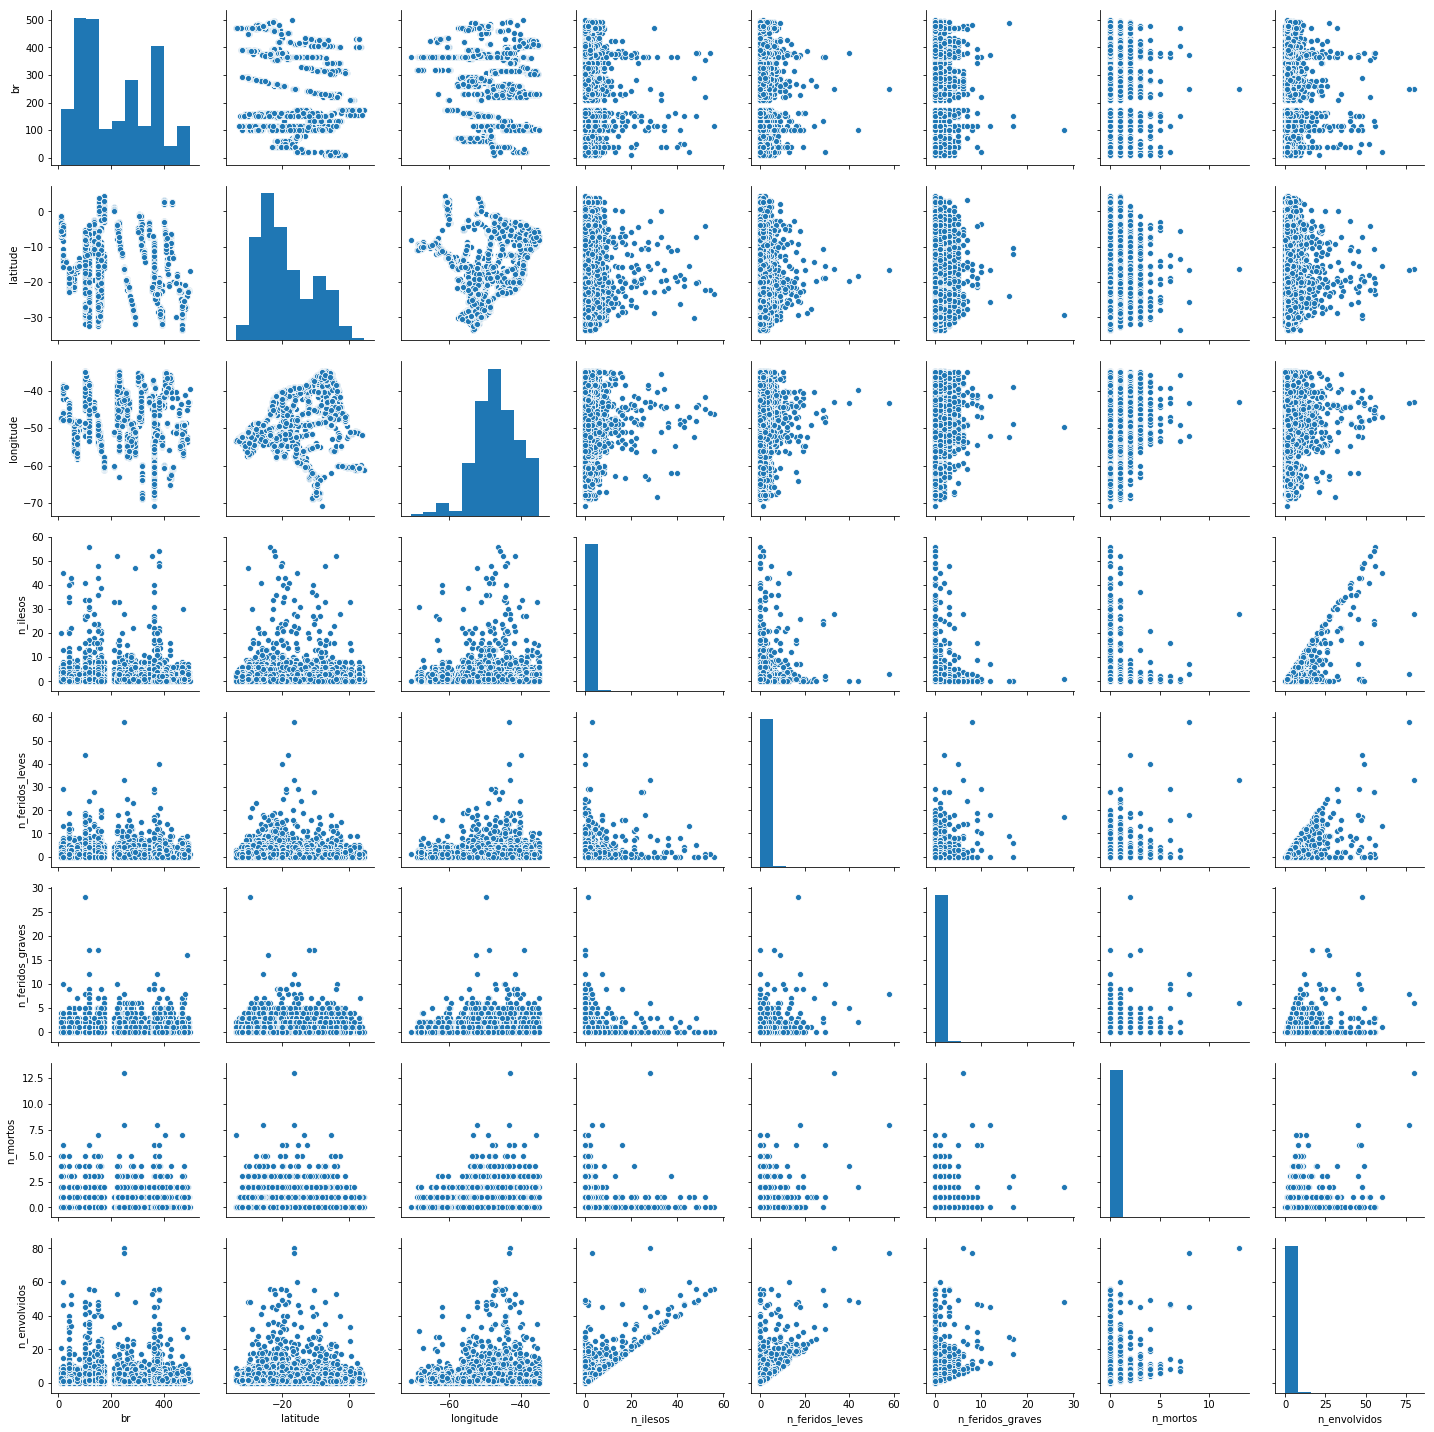

In [6]:
# Algumas coisas para plotar

# Número de acidentes por dia da semana
# Número de acidentes por tipo de acidente
# Número de acidentes por fase do dia
# Número de acidentes por causa

sb.pairplot(accident_data)